# Notebook to visualize **best hyperparameter** from ASHA HPO

## Move (and symlink) checkpoints to another disk to free space

In [5]:
import glob
from train_utils import replace_with_symlink
# find pytorch.bin files
target_disk = "/data"
for ckpt in glob.glob("/nobackup/wenxuan/sparse_matrix_fine_tuning/results/**/pytorch_model.bin", recursive=True):
    replace_with_symlink(ckpt, target_disk)

## Plot trade-off curves against LoRA

In [2]:
monarch_ranks = [4, 8, 16, 32, 64]
monarch_rank_params = [0.14, 0.28, 0.56, 1.13, 2.25]
monarch_rank_res = [69.91, 69.8, 67.99, 69.51, 69.98]

lora_ranks = [4, 8, 16]
lora_params = [0.38, 0.76, 1.52]
lora_res = [65.0543, 68.3, 67.99667905057818]

monarch_blkszs = [1, 4, 16, 32, 64]
monarch_blksz_params = [0.14, 0.56, 2.25, 4.5, 9.]
monarch_blksz_res = [55.76, 62.39, 68.88, 67.9, 70.29]

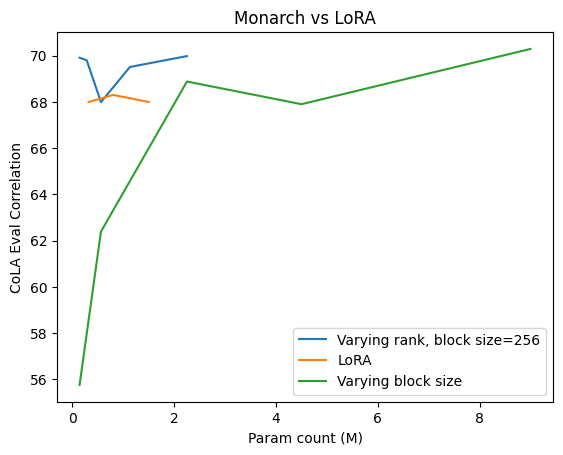

In [3]:
# plot rank vs lora, and then blksz vs lora as two lines connecting dots
import matplotlib.pyplot as plt

plt.title("Monarch vs LoRA")
plt.xlabel("Param count (M)")
plt.ylabel("CoLA Eval Correlation")

plt.plot(monarch_rank_params, monarch_rank_res, label="Varying rank, block size=256")
plt.plot(lora_params, lora_res, label="LoRA")
plt.plot(monarch_blksz_params, monarch_blksz_res, label="Varying block size")
# replace xticks with ranks
# monarch_ranks = [f"rank {r}" for r in monarch_ranks]
# plt.xticks(monarch_rank_params, monarch_ranks)


# lora_ranks = [f"rank {r}" for r in lora_ranks]
# plt.xticks(lora_params, lora_ranks)

plt.legend()
plt.savefig("monarch_vs_lora.png")
plt.show()


## Plot Hyperparams found in HPO

In [ ]:
import glob
import json
tune_groups = ["dense rank 32", "dense rank 16"]
hp_groups = {}
results_path = "/results"
# find all folders with the tune_group name
for tune_group in tune_groups:
    jsons = glob.glob(f"{results_path}/**/{tune_group}/*.json", recursive=True)
    jsons = [json.load(open(j, "r")) for j in jsons]
    hp_groups[tune_group] = jsons

### plot by task or compare different groups